In [1]:
# Importing Libraries 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sn 

In [2]:
# Load the dataset 
trade = pd.read_csv('historical_data.csv')          
sentiment = pd.read_csv('fear_greed_index.csv')     # fear greed - sentiment 

In [3]:
# Checking the data
print(trade.head())       # return top 5 features of the dataframe 
print(sentiment.head())    # return top 5 features of the dataframe 
print (trade.info())      # describes the data 
print (sentiment.info())  # describes the data

                                      Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   Size Tokens  Size USD Side     Timestamp IST  Start Position Direction  \
0       986.87   7872.16  BUY  02-12-2024 22:50        0.000000       Buy   
1        16.00    127.68  BUY  02-12-2024 22:50      986.524596       Buy   
2       144.09   1150.63  BUY  02-12-2024 22:50     1002.518996       Buy   
3       142.98   1142.04  BUY  02-12-2024 22:50     1146.558564       Buy   
4         8.73     69.75  BUY  02-12-2024 22:50     1289.488521       Buy   

   Closed PnL                                   Transaction Hash     Order ID  \
0         0.0  0xec0945

In [4]:
trade['Timestamp IST'].isnull()   # we dont have any null value in timestamp IST

0         False
1         False
2         False
3         False
4         False
          ...  
211219    False
211220    False
211221    False
211222    False
211223    False
Name: Timestamp IST, Length: 211224, dtype: bool

In [5]:
# Converting the timestamp to date 
trade['Timestamp IST'] = pd.to_datetime(trade['Timestamp IST'], format='%d-%m-%Y %H:%M')  # this date format is in the dataframe trade
trade['trade_date'] = trade['Timestamp IST'].dt.date     # Extract only date (without time)

In [6]:
# Did this conversion, so the columns of trade and sentiment matches, as sentiment has only date.

In [7]:
sentiment['date'] = pd.to_datetime(sentiment['date']).dt.date   # conversion of sentiment date column to datetime(only date)

In [8]:
# Combining both trade and sentiment
trade_sentiment = pd.merge(trade,sentiment,left_on='trade_date',right_on='date',how = 'left')

In [9]:
trade_sentiment.head(2)

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,...,Order ID,Crossed,Fee,Trade ID,Timestamp,trade_date,timestamp,value,classification,date
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02,1.733117e+09,80.0,Extreme Greed,2024-12-02
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02,1.733117e+09,80.0,Extreme Greed,2024-12-02


In [10]:
# Dropping the Timestamp column 
trade_sentiment = trade_sentiment.drop(['Timestamp'], axis=1)
trade_sentiment = trade_sentiment.drop(['timestamp'], axis=1)

In [11]:
trade_sentiment.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,trade_date,value,classification,date
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,2024-12-02,80.0,Extreme Greed,2024-12-02
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,2024-12-02,80.0,Extreme Greed,2024-12-02
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,2024-12-02,80.0,Extreme Greed,2024-12-02
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,2024-12-02,80.0,Extreme Greed,2024-12-02
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,2024-12-02,80.0,Extreme Greed,2024-12-02


In [12]:
# Checking the merged data 

print(trade_sentiment.isna().sum())
print(trade_sentiment['classification'].value_counts())

Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 0
Trade ID            0
trade_date          0
value               6
classification      6
date                6
dtype: int64
classification
Fear             61837
Greed            50303
Extreme Greed    39992
Neutral          37686
Extreme Fear     21400
Name: count, dtype: int64


In [13]:
# We have 6 rows missing in classification, date, value which means date didn't matched there, so we will drop those rows.
trade_sentiment = trade_sentiment.dropna(subset=['value','classification','date'])

In [14]:
print(trade_sentiment.isna().sum())

Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 0
Trade ID            0
trade_date          0
value               0
classification      0
date                0
dtype: int64


|Column|	Description|
|-|-|
|Account|	Unique ID for the trader’s account. Helps track individual trader behavior.
|Coin|	The trading symbol (e.g., BTC, ETH). Indicates what asset was traded.
|Execution Price|	The price at which the trade was executed.
|Size Tokens	|Quantity of tokens traded (e.g., 0.5 BTC).
|Size USD	|Equivalent USD value of the trade. (Size Tokens × Execution Price).
|Side	|Trade direction: 'Buy' or 'Sell'.
|Timestamp IST|	The exact date and time the trade occurred, in IST (India Standard Time).
|Start Position	|Trader’s position before the trade (e.g., if they were already long/short).
|Direction|	Direction of the position opened or maintained (e.g., 'Long' or 'Short').
|Closed PnL|	Realized profit/loss after the trade was closed.
|Transaction Hash|	Unique ID for the blockchain transaction (if applicable). Helps trace the trade.
|Order ID	|Unique identifier for the order (within the platform).
|Crossed	|Indicates whether the trade crossed the order book (i.e., aggressive order).
|Fee	|Trading fee charged for the trade.
|Trade ID|	Unique identifier for each trade (different from Order ID).
|trade_date|	Date-only version of Timestamp IST, used for merging with sentiment data.
|value	|Market sentiment score (typically 0–100). Higher = more greedy.
|classification	|Market mood: 'Fear' or 'Greed', based on the sentiment score.
|date	|Date from the sentiment dataset, used in the merge.|

took this from chatgpt

In [15]:
# now, to explore relationships between trader performance and market sentiment, and insights, here are some questions that will help.
# a) Average pnl on fear and greed 
# b) which side traders prefer on fear and greed?
# c) are traders aggresive(crossed) on fear/greedy days?
# d) Size tokens vs classification - indicates traders do buy/sel in large quantity when market is in greedy /fear 
# e) Do traders prefer Long or Short positions on Fear vs Greed days?

In [16]:
trade_sentiment.columns

Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'trade_date', 'value', 'classification', 'date'],
      dtype='object')

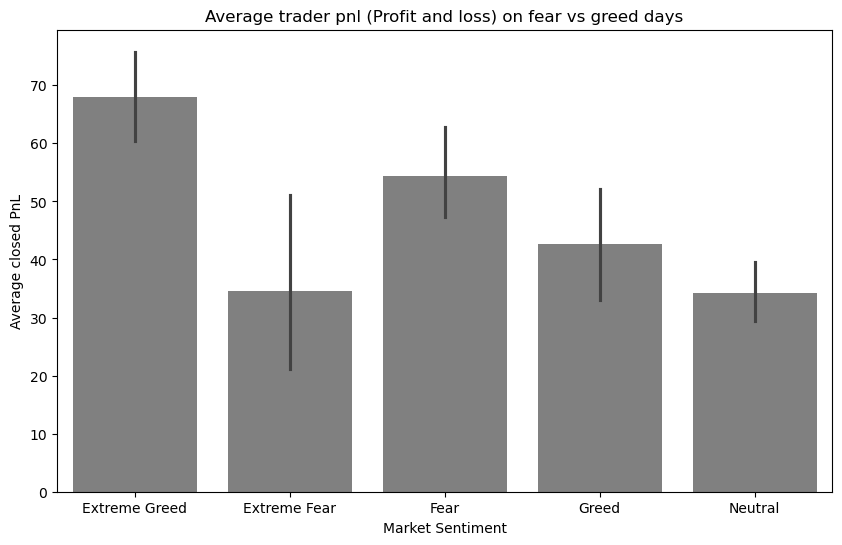

In [17]:
# a) Average pnl on fear and greed 
plt.figure(figsize=[10,6])
sn.barplot(data=trade_sentiment, x='classification', y='Closed PnL', estimator='mean',color='grey')
plt.title('Average trader pnl (Profit and loss) on fear vs greed days')
plt.xlabel('Market Sentiment')
plt.ylabel('Average closed PnL')
plt.show()

In [18]:
# Insights

# In the above barplot, we see that:
# On Extreme Greed Days - traders achieve the highest average profit.
# On Neutral Days - It has the lowest average PnL, indicates lackness in decision because of fall and rise of market.
# On Fear and Greed days falls in between average PnL.
# On Extreme fear there is a dip in Average PnL.

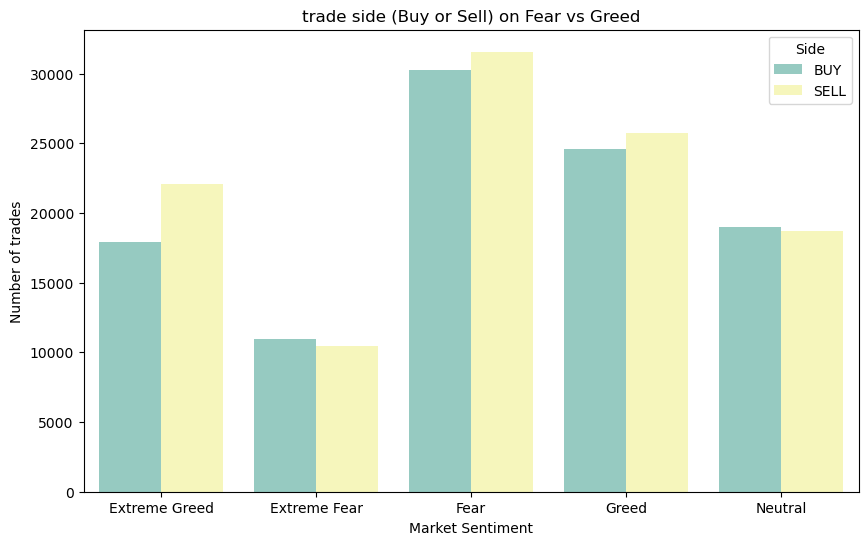

In [19]:
# b) which side traders prefer on fear and greed?
plt.figure(figsize=[10,6])
sn.countplot(trade_sentiment,x='classification', hue='Side', palette='Set3' )
plt.title('trade side (Buy or Sell) on Fear vs Greed')
plt.xlabel('Market Sentiment')
plt.ylabel('Number of trades')
plt.legend(title='Side')
plt.show()

In [20]:
# Insights

# In the above countplot, we see that:
# The Most Buys as well as sells are on Fear days.
# The lowest buys as well as sells are on Extreme fear days. 
# While days like extreme greed, greed, neutral buys and sells falls between.

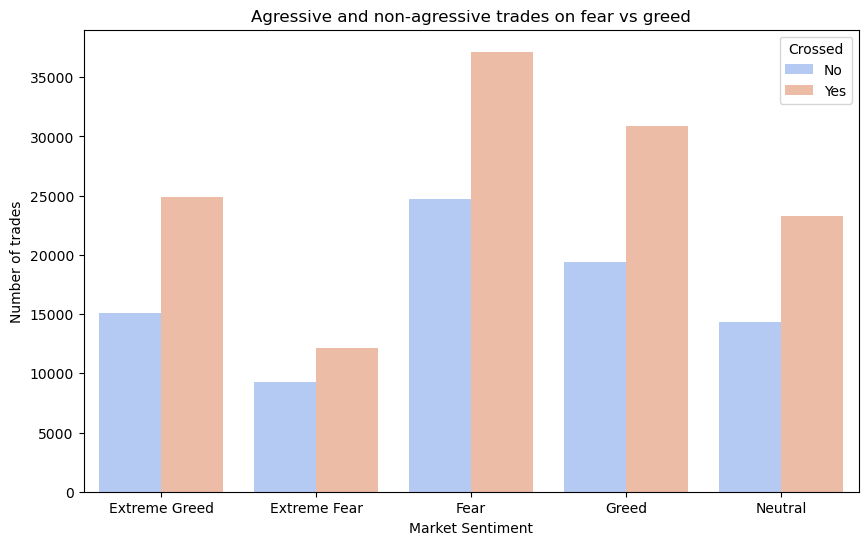

In [21]:
# c) are traders aggresive(crossed) on fear/greedy days?
plt.figure(figsize=[10,6])
sn.countplot(trade_sentiment, x='classification', hue = 'Crossed',palette='coolwarm')
plt.title('Agressive and non-agressive trades on fear vs greed')
plt.xlabel('Market Sentiment')
plt.ylabel('Number of trades')
plt.legend(title='Crossed',labels=['No','Yes'])
plt.show()

In [22]:
# Insights

# In the above countplot, we see that:
# Most crossed trades are when the market has fear days.
# While it is lowest when market goes Extreme fear days.
# And the Extreme Greed, Greed, Neutral falls in between. 

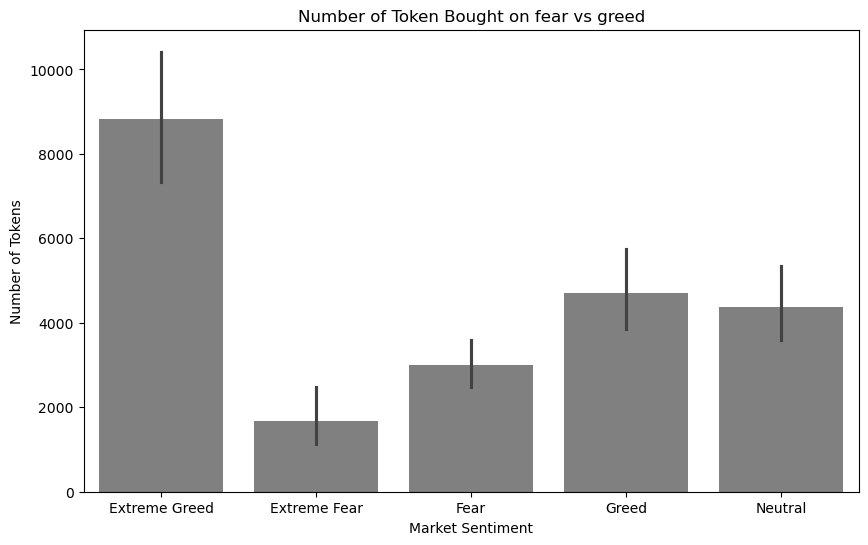

In [23]:
# d) Size tokens vs classification
plt.figure(figsize=[10,6])
sn.barplot(trade_sentiment,x='classification',y='Size Tokens',color='grey')
plt.title('Number of Token Bought on fear vs greed')
plt.xlabel('Market Sentiment')
plt.ylabel('Number of Tokens')
plt.show()

In [24]:
# Insights

# In the above barplot, we see that:
# The most number of token are Bought on Extreme greed days.
# The lowest number of tokens were bought on extreme fear days.
# Also there is not a large number of buys of Fear days. 
# Greed and Neutral days have average number of token buyed.

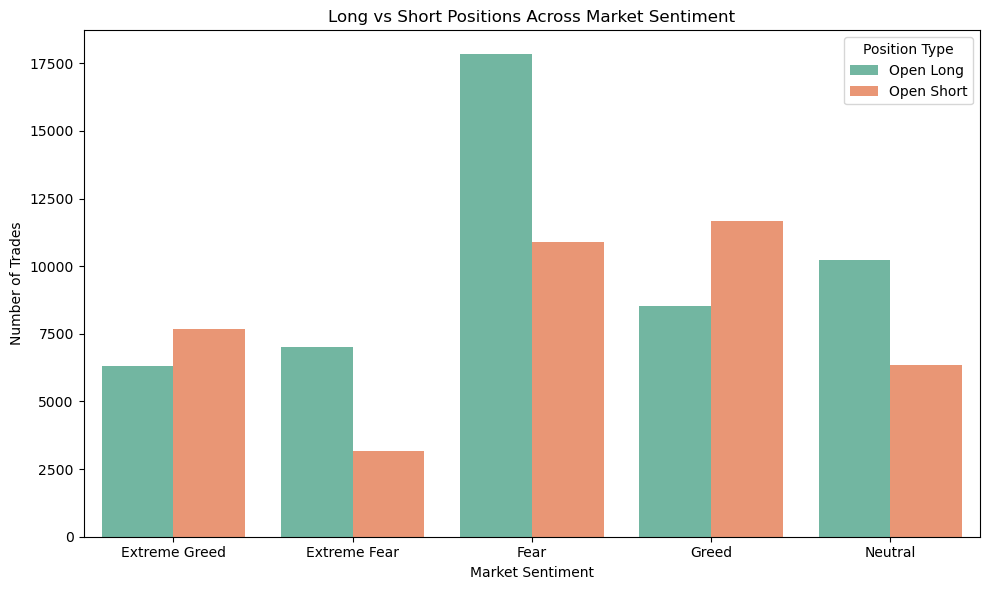

In [25]:
# e) Do traders prefer Long or Short positions on Fear vs Greed days?
plt.figure(figsize=[10,6])
sn.countplot(data=trade_sentiment, x='classification', hue='Direction',hue_order=['Open Long', 'Open Short'], palette='Set2')
plt.title('Long vs Short Positions Across Market Sentiment')
plt.xlabel('Market Sentiment')
plt.ylabel('Number of Trades')
plt.legend(title='Position Type')
plt.tight_layout()
plt.show()

In [26]:
# Insights

# In the above countplot, we see that:
# Most Traders buys to start for a long duration expecting the price to go up while the Fear days.
# While Traders buys for short duration when market is facing extreme fear conditions.
# The most short duration trades are done when the market has greed days.
# And the lowest long duration trades are done when the market has extreme greed, traders do sell it expecting no price will rise than this.